In [1]:
import numpy as np
# from keras.preprocessing import image
from keras.applications import inception_v3

import keras.utils as image

In [2]:
# Load pre-trained image recognition model
model = inception_v3.InceptionV3()

96112376/96112376 [==============================] - 1s 0us/step


In [3]:
cat = "/content/drive/MyDrive/dataset/inception_imgae/White_Persian_Cat.jpg"

# Load the image file and convert it to a numpy array
img = image.load_img(cat, target_size=(299, 299))
input_image = image.img_to_array(img)

# Scale the image so all pixel intensities are between [-1, 1] as the model expects
input_image /= 255.
input_image -= 0.5
input_image *= 2.

# Add a 4th dimension for batch size (as Keras expects)
input_image = np.expand_dims(input_image, axis=0)

# Run the image through the neural network
predictions = model.predict(input_image)

# Convert the predictions into text and print them
predicted_classes = inception_v3.decode_predictions(predictions, top=1)
imagenet_id, name, confidence = predicted_classes[0][0]
print("This is a {} with {:.4}% confidence!".format(name, confidence * 100))

35363/35363 [==============================] - 0s 0us/step
This is a Persian_cat with 95.16% confidence!


In [4]:
from keras import backend as K
from PIL import Image
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [5]:
# Load pre-trained image recognition model
model = inception_v3.InceptionV3()

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
# Grab a reference to the first and last layer of the neural net
model_input_layer = model.layers[0].input
model_output_layer = model.layers[-1].output

# Choose an ImageNet object to fake
# The list of classes is available here: https://gist.github.com/ageitgey/4e1342c10a71981d0b491e1b8227328b
# Class #859 is "toaster"
object_type_to_fake = 859

# Load the image to hack
img = image.load_img(cat, target_size=(299, 299))
original_image = image.img_to_array(img)

# Scale the image so all pixel intensities are between [-1, 1] as the model expects
original_image /= 255.
original_image -= 0.5
original_image *= 2.

# Add a 4th dimension for batch size (as Keras expects)
original_image = np.expand_dims(original_image, axis=0)

# Pre-calculate the maximum change we will allow to the image
# We'll make sure our hacked image never goes past this so it doesn't look funny.
# A larger number produces an image faster but risks more distortion.
max_change_above = original_image + 0.01
max_change_below = original_image - 0.01

# Create a copy of the input image to hack on
hacked_image = np.copy(original_image)

# How much to update the hacked image in each iteration
learning_rate = 0.1

# Define the cost function.
# Our 'cost' will be the likelihood out image is the target class according to the pre-trained model
cost_function = model_output_layer[0, object_type_to_fake]

# We'll ask Keras to calculate the gradient based on the input image and the currently predicted class
# In this case, referring to "model_input_layer" will give us back image we are hacking.
gradient_function = K.gradients(cost_function, model_input_layer)[0]

# Create a Keras function that we can call to calculate the current cost and gradient
grab_cost_and_gradients_from_model = K.function([model_input_layer, K.learning_phase()], [cost_function, gradient_function])

cost = 0.0

# In a loop, keep adjusting the hacked image slightly so that it tricks the model more and more
# until it gets to at least 80% confidence
while cost < 0.80:
    # Check how close the image is to our target class and grab the gradients we
    # can use to push it one more step in that direction.
    # Note: It's really important to pass in '0' for the Keras learning mode here!
    # Keras layers behave differently in prediction vs. train modes!
    cost, gradients = grab_cost_and_gradients_from_model([hacked_image, 0])

    # Move the hacked image one step further towards fooling the model
    hacked_image += gradients * learning_rate

    # Ensure that the image doesn't ever change too much to either look funny or to become an invalid image
    hacked_image = np.clip(hacked_image, max_change_below, max_change_above)
    hacked_image = np.clip(hacked_image, -1.0, 1.0)

    print("Model's predicted likelihood that the image is a toaster: {:.8}%".format(cost * 100))

# De-scale the image's pixels from [-1, 1] back to the [0, 255] range
img = hacked_image[0]
img /= 2.
img += 0.5
img *= 255.

# Save the hacked image!
im = Image.fromarray(img.astype(np.uint8))
im.save("hacked-image.png")
im.save('/content/drive/MyDrive/dataset/hacked_img/hack_img.png', 'png')
im.show()

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Model's predicted likelihood that the image is a toaster: 0.0046821944%
Model's predicted likelihood that the image is a toaster: 0.0046835103%
Model's predicted likelihood that the image is a toaster: 0.0046848469%
Model's predicted likelihood that the image is a toaster: 0.0046861947%
Model's predicted likelihood that the image is a toaster: 0.0046875357%
Model's predicted likelihood that the image is a toaster: 0.0046888588%
Model's predicted likelihood that the image is a toaster: 0.0046902027%
Model's predicted likelihood that the image is a toaster: 0.0046915247%
Model's predicted likelihood that the image is a toaster: 0.0046928897%
Model's predicted likelihood that the image is a toaster: 0.0046942456%
Model's predicted likelihood that the image is a toaster: 0.0046955927%
Model's predicted likelihood that the image is a toaster: 0.0046969413%
Model's predicted likelihood that the image is a toaster: 0.0046982979%
Model's predicted likelihood

In [8]:
hack = "/content/drive/MyDrive/dataset/hacked_img/hack_img.png"

# Load the image file and convert it to a numpy array
img = image.load_img(hack, target_size=(299, 299))
input_image = image.img_to_array(img)

# Scale the image so all pixel intensities are between [-1, 1] as the model expects
input_image /= 255.
input_image -= 0.5
input_image *= 2.

# Add a 4th dimension for batch size (as Keras expects)
input_image = np.expand_dims(input_image, axis=0)

# Run the image through the neural network
predictions = model.predict(input_image)

# Convert the predictions into text and print them
predicted_classes = inception_v3.decode_predictions(predictions, top=1)
imagenet_id, name, confidence = predicted_classes[0][0]
print("This is a {} with {:.4}% confidence!".format(name, confidence * 100))

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


This is a toaster with 97.02% confidence!


In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [15]:
cat = "/content/drive/MyDrive/dataset/inception_imgae/White_Persian_Cat.jpg"

# Load the image file and convert it to a numpy array
cat_img = image.load_img(cat, target_size=(299, 299))

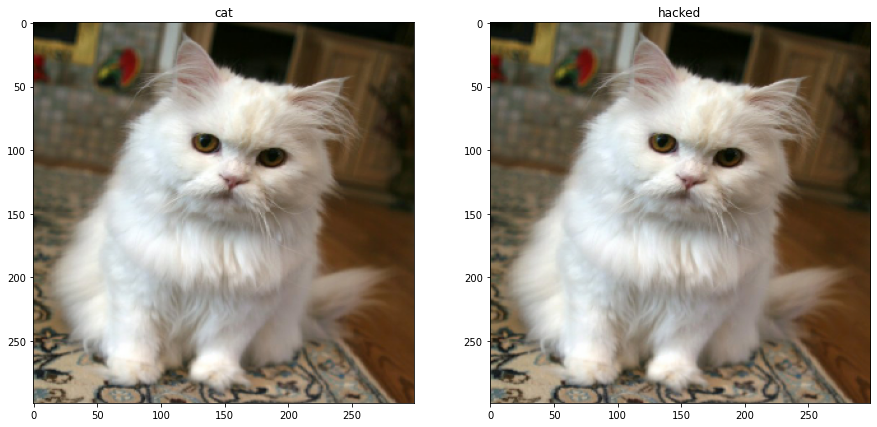

In [16]:
# cat_pic = mpimg.imread(cat)
hack_pic = mpimg.imread(hack)


plt.figure(figsize=(15, 10))
plt.subplot(1,2,1)
plt.title('cat')
plt.imshow(cat_img)
plt.subplot(1,2,2)
plt.title('hacked')
plt.imshow(hack_pic)
